In [1]:
# import necessary module
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from collections import Counter
from Bio import pairwise2
# read file content
summary = {}
with open("summary.txt", "r") as file:
    for line in file:
        line_arr = line.rstrip().split("==>")
        summary[line_arr[0]] = eval(line_arr[1])


millnames = ['',' T',' M',' B',' T']

def millify(n):
    n = float(n)
    millidx = max(0,min(len(millnames)-1,
                        int(math.floor(0 if n == 0 else math.log10(abs(n))/3))))

    return '{:.0f}{}'.format(n / 10**(3 * millidx), millnames[millidx])

# Length of the sequences in histogram

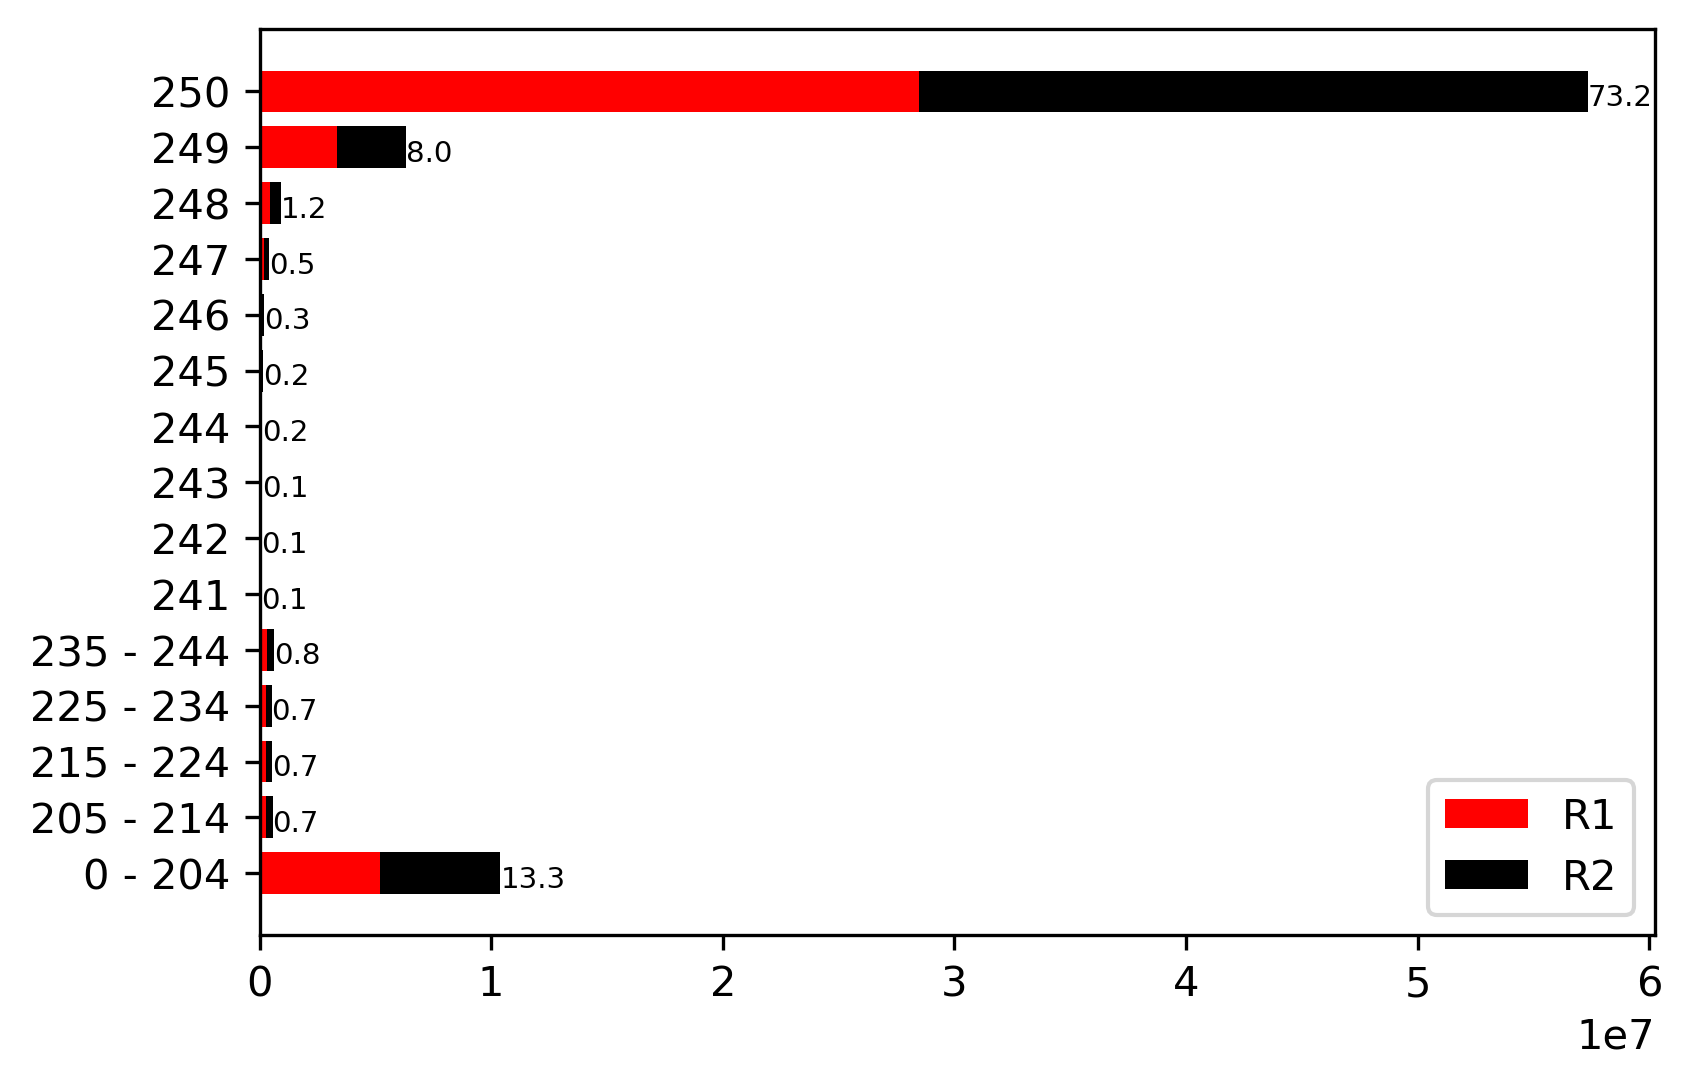

In [2]:
fig, ax = plt.subplots(dpi=300)

x = list(summary['r1_length_counter'].keys())
y = list(summary['r1_length_counter'].values())

summary["length_total"] = {}
total = 0
for key in x:
    summary["length_total"][key] = summary['r1_length_counter'][key] + summary['r2_length_counter'][key]
    total += summary["length_total"][key]
summary["length_total_percentage"] = {k: round(v*100/total, 2) for k, v in summary["length_total"].items()}

ax.barh(np.arange(len(x)), y, .75, color='red', label="R1")
ax.barh(np.arange(len(x)), list(summary['r2_length_counter'].values()), .75, left=y, color='black', label="R2")
for i, (k, v) in enumerate(summary["length_total"].items()):
    ax.text(v, i-.25, str(round(summary["length_total_percentage"][k],1)), color='black', fontsize=7)
ax.set_yticks(tuple(np.arange(len(x))))
ax.set_yticklabels(x)
ax.legend()

# Unique sequences

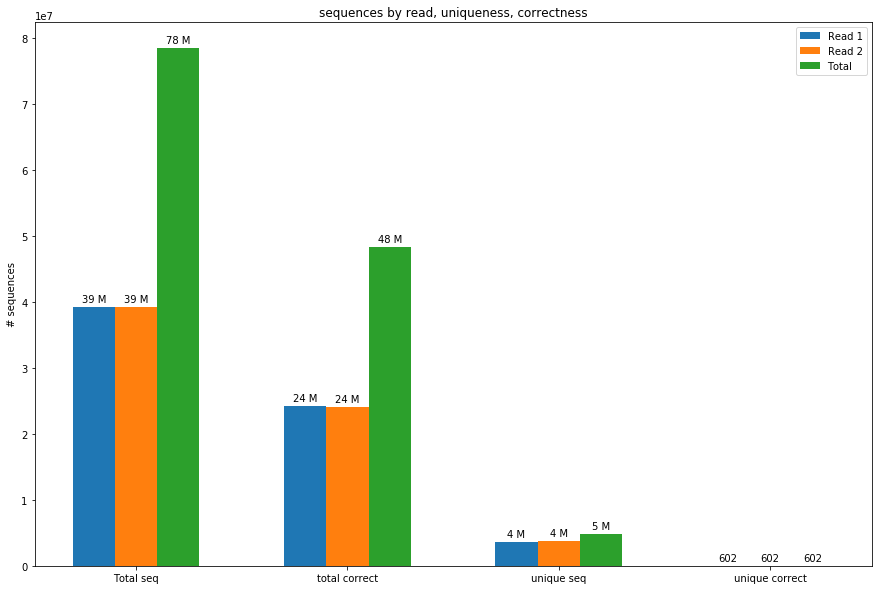

In [3]:
read_1 = {
    'Total seq':  summary['r1 total sequences'],
    'total correct': summary['r1 total correct'],
    'unique seq': summary['r1 total unique'],
    'unique correct': summary['r1 unique correct']
}
read_2 = {
    'Total seq':  summary['r2 total sequences'],
    'total correct': summary['r2 total correct'],
    'unique seq': summary['r2 total unique'],
    'unique correct': summary['r2 unique correct']
}
total = {
    'Total seq':  summary['r2 total sequences'] + summary['r1 total sequences'],
    'total correct': summary['total  correct'],
    'unique seq': summary['total unique'],
    'unique correct': summary['total unique correct']
}
labels = list(read_1.keys())
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 10))
read_1 = ax.bar(x - width, read_1.values(), width, label='Read 1')
read_2 = ax.bar(x, read_2.values(), width, label='Read 2')
total = ax.bar(x + width, total.values(), width, label='Total')
ax.set_ylabel('# sequences')
ax.set_title('sequences by read, uniqueness, correctness')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(millify(height)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(read_1)
autolabel(read_2)
autolabel(total)

# Sequence correctness

## Correctness on Total sequences

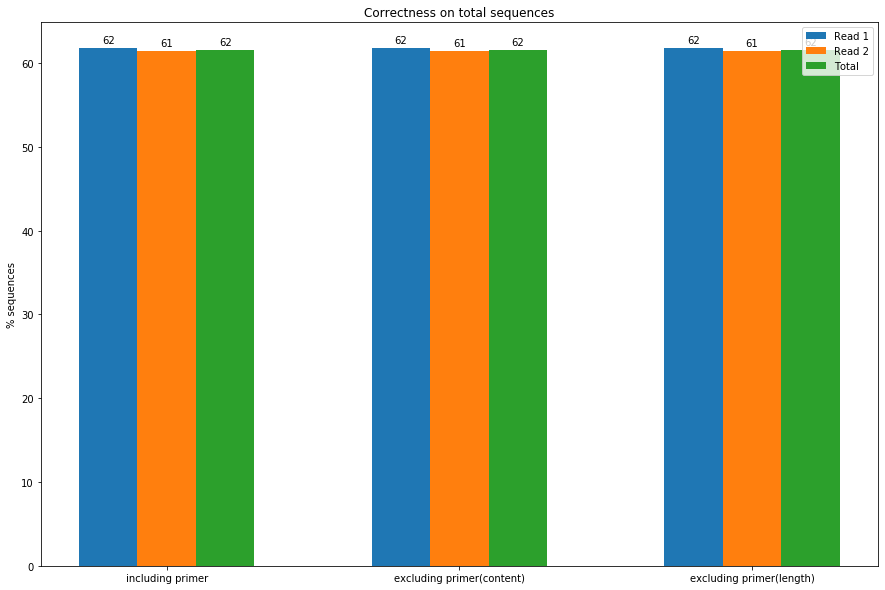

In [4]:
total = {
    'including primer': round(summary['total  correct'] * 100 / summary['total sequence'], 2),
    'excluding primer(content)': round(summary['total correct(excluding primer based on content)'] * 100 / summary['total sequence'], 2),
    'excluding primer(length)': round(summary['total  correct sequences in both reads(excluding primer based on length)'] * 100 / summary['total sequence'], 2)
}
read_1 = {
    'including primer': round(summary['r1 total correct'] * 100 / summary['r1 total sequences'], 2),
    'excluding primer(content)': round(summary['r1 total correct(excluding primer based on content)'] * 100 / summary['r1 total sequences'], 2),
    'excluding primer(length)': round(summary['r1 total correct(excluding primer based on length)'] * 100 / summary['r1 total sequences'], 2)
}
read_2 = {
    'including primer': round(summary['r2 total correct'] * 100 / summary['r2 total sequences'], 2),
    'excluding primer(content)': round(summary['r2 total correct(excluding primer based on content)'] * 100 / summary['r2 total sequences'], 2),
    'excluding primer(length)': round(summary['r2 total correct(excluding primer based on length)'] * 100 / summary['r2 total sequences'], 2)
}

labels = list(read_1.keys())
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 10))
read_1 = ax.bar(x - width, read_1.values(), width, label='Read 1')
read_2 = ax.bar(x, read_2.values(), width, label='Read 2')
total = ax.bar(x + width, total.values(), width, label='Total')
ax.set_ylabel('% sequences')
ax.set_title('Correctness on total sequences')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
autolabel(read_1)
autolabel(read_2)
autolabel(total)

## Correctness on unique sequences

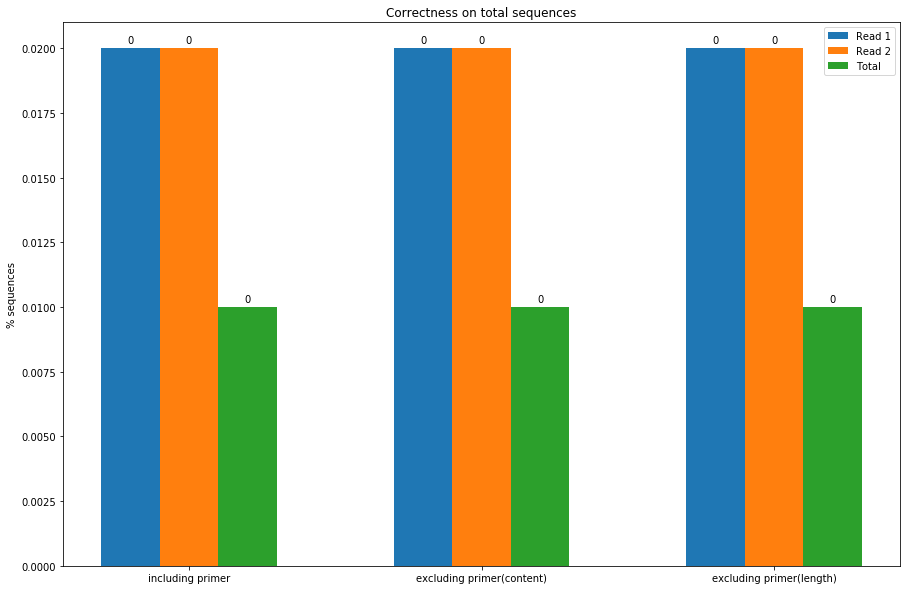

In [5]:
total = {
    'including primer': round(summary['total unique correct'] * 100 / summary['total unique'], 2),
    'excluding primer(content)': round(summary['total unique correct(excluding primer based on content)'] * 100 / summary['total unique'], 2),
    'excluding primer(length)': round(summary['total unique correct sequences in both reads(excluding primer based on length)'] * 100 / summary['total unique'], 2)
}
read_1 = {
    'including primer': round(summary['r1 unique correct'] * 100 / summary['r1 total unique'], 2),
    'excluding primer(content)': round(summary['r1 unique correct(excluding primer based on content)'] * 100 / summary['r1 total unique'], 2),
    'excluding primer(length)': round(summary['r1 unique correct(excluding primer based on length)'] * 100 / summary['r1 total unique'], 2)
}
read_2 = {
    'including primer': round(summary['r2 unique correct'] * 100 / summary['r2 total unique'], 2),
    'excluding primer(content)': round(summary['r2 unique correct(excluding primer based on content)'] * 100 / summary['r2 total unique'], 2),
    'excluding primer(length)': round(summary['r2 unique correct(excluding primer based on content)'] * 100 / summary['r2 total unique'], 2)
}

labels = list(read_1.keys())
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 10))
read_1 = ax.bar(x - width, read_1.values(), width, label='Read 1')
read_2 = ax.bar(x, read_2.values(), width, label='Read 2')
total = ax.bar(x + width, total.values(), width, label='Total')
ax.set_ylabel('% sequences')
ax.set_title('Correctness on total sequences')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
autolabel(read_1)
autolabel(read_2)
autolabel(total)

# Error distribution

## Error distribution on unique sequences

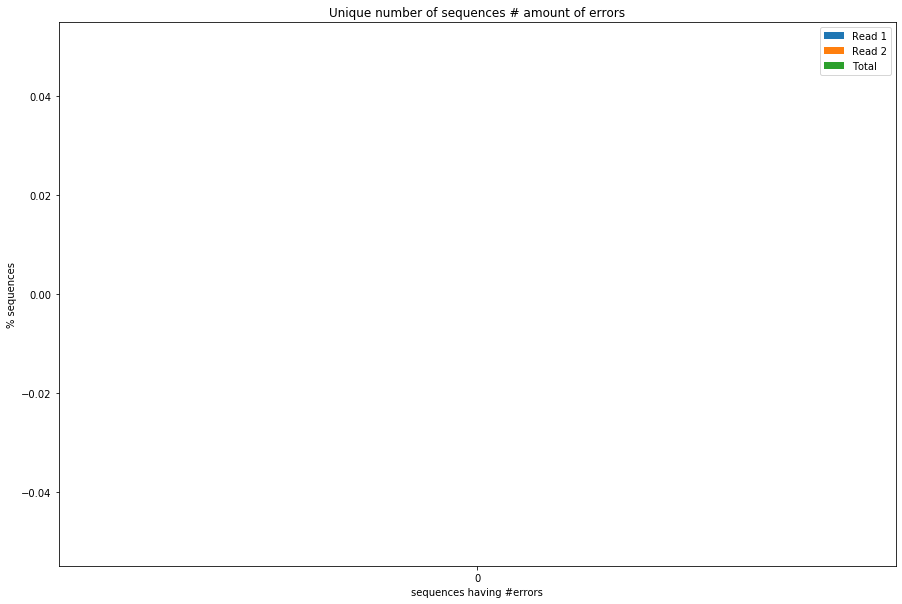

In [6]:
total = {k: round(v / summary['total unique'], 2) * 100 for k, v in summary['unique error distribution'].items()}
read_1 = {k: round(v / summary['r1 total unique'], 2) * 100 for k, v in summary['r1_unique_err_distribution'].items()}
read_2 = {k: round(v / summary['r2 total unique'], 2) * 100 for k, v in summary['r2_unique_err_distribution'].items()}

#values
labels = sorted(list(read_1.keys()))
total_values = [total.get(label,0) for label in labels]
read1_values = [read_1.get(label,0) for label in labels]
read2_values = [read_2.get(label,0) for label in labels]
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 10))
read_1 = ax.bar(x - width, read1_values, width, label='Read 1')
read_2 = ax.bar(x, read2_values, width, label='Read 2')
total = ax.bar(x + width, total_values, width, label='Total')
ax.set_ylabel('% sequences')
ax.set_xlabel("sequences having #errors")
ax.set_title('Unique number of sequences # amount of errors')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
#autolabel(read_1)
#autolabel(read_2)
#autolabel(total)

## Error distribution on total sequences

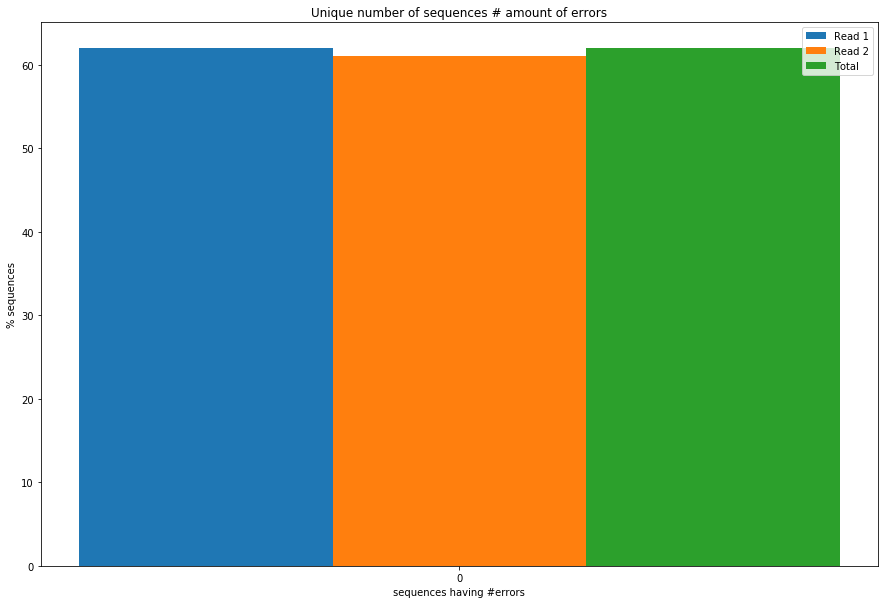

In [7]:
total = {k: round(v / summary['total sequence'], 2) * 100 for k, v in summary['total_error_distribution'].items()}
read_1 = {k: round(v / summary['r1 total sequences'], 2) * 100 for k, v in summary['r1_total_err_distribution'].items()}
read_2 = {k: round(v / summary['r2 total sequences'], 2) * 100 for k, v in summary['r2_total_err_distribution'].items()}

#values
labels = sorted(list(read_1.keys()))
total_values = [total.get(label,0) for label in labels]
read1_values = [read_1.get(label,0) for label in labels]
read2_values = [read_2.get(label,0) for label in labels]
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 10))
read_1 = ax.bar(x - width, read1_values, width, label='Read 1')
read_2 = ax.bar(x, read2_values, width, label='Read 2')
total = ax.bar(x + width, total_values, width, label='Total')
ax.set_ylabel('% sequences')
ax.set_xlabel("sequences having #errors")
ax.set_title('Unique number of sequences # amount of errors')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Correctness on primer only

## Primer correctness on unique sequences

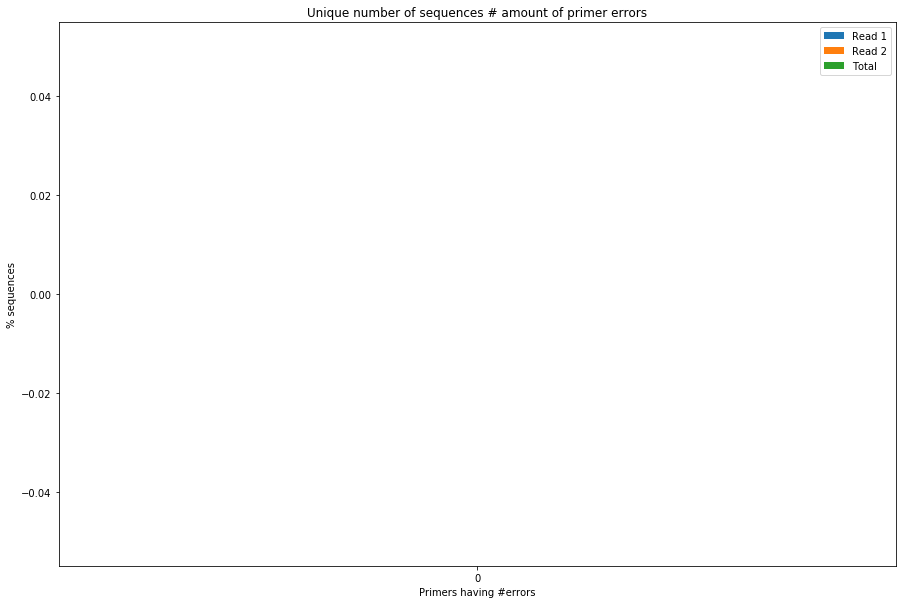

In [8]:
total = {k: round(v / summary['total unique'], 2) * 100 for k, v in summary['unique_primer_error_distribution'].items()}
read_1 = {k: round(v / summary['r1 total unique'], 2) * 100 for k, v in summary['r1_unique_primer_err_distribution'].items()}
read_2 = {k: round(v / summary['r2 total unique'], 2) * 100 for k, v in summary['r2_unique_primer_err_distribution'].items()}

#values
labels = sorted(list(read_1.keys()))
total_values = [total.get(label,0) for label in labels]
read1_values = [read_1.get(label,0) for label in labels]
read2_values = [read_2.get(label,0) for label in labels]
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 10))
read_1 = ax.bar(x - width, read1_values, width, label='Read 1')
read_2 = ax.bar(x, read2_values, width, label='Read 2')
total = ax.bar(x + width, total_values, width, label='Total')
ax.set_ylabel('% sequences')
ax.set_xlabel("Primers having #errors")
ax.set_title('Unique number of sequences # amount of primer errors')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

## Primer sequences on all sequences

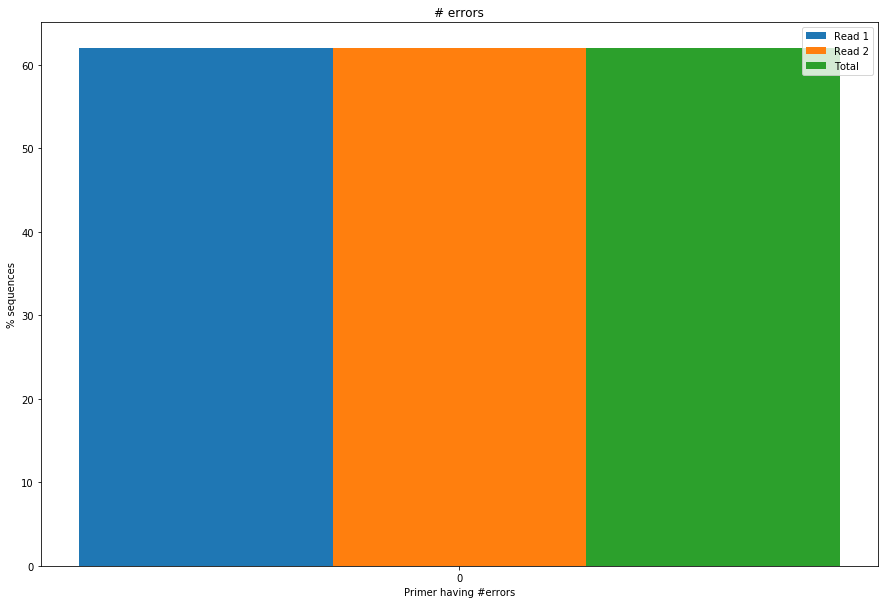

In [9]:
total = {k: round(v / summary['total sequence'], 2) * 100 for k, v in summary['total_primer_error_distribution'].items()}
read_1 = {k: round(v / summary['r1 total sequences'], 2) * 100 for k, v in summary['r1_total_primer_err_distribution'].items()}
read_2 = {k: round(v / summary['r2 total sequences'], 2) * 100 for k, v in summary['r2_total_primer_err_distribution'].items()}

#values
labels = sorted(list(read_1.keys()))
total_values = [total.get(label,0) for label in labels]
read1_values = [read_1.get(label,0) for label in labels]
read2_values = [read_2.get(label,0) for label in labels]
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 10))
read_1 = ax.bar(x - width, read1_values, width, label='Read 1')
read_2 = ax.bar(x, read2_values, width, label='Read 2')
total = ax.bar(x + width, total_values, width, label='Total')
ax.set_ylabel('% sequences')
ax.set_xlabel("Primer having #errors")
ax.set_title('# errors')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Number of times each sequences appeared

## Ground truth frequency

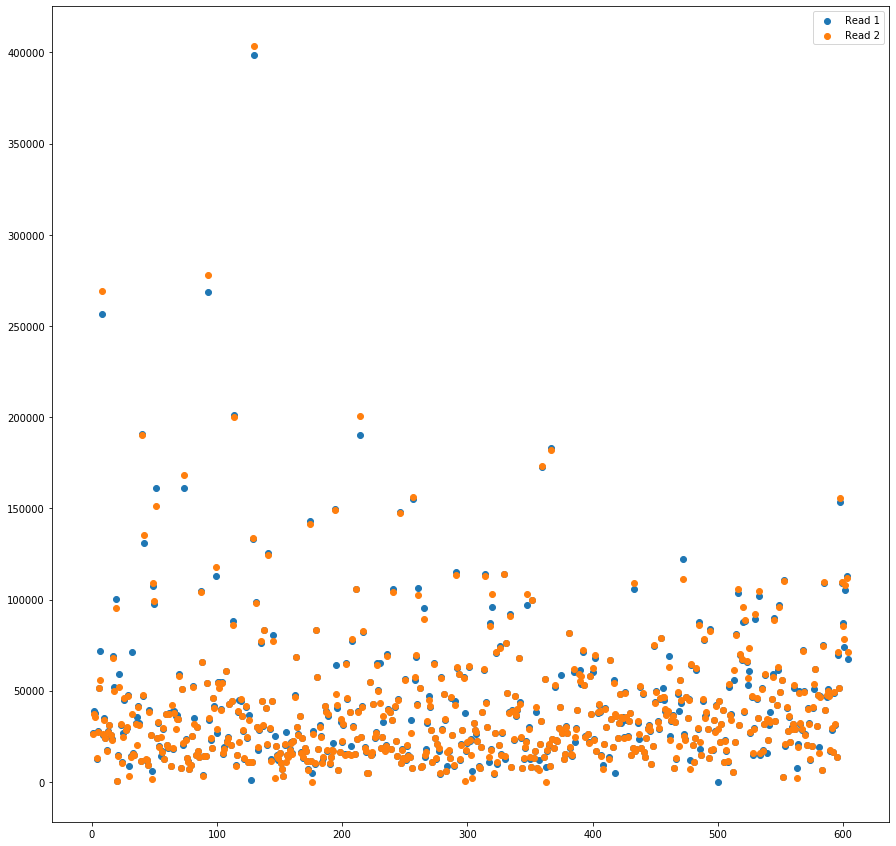

In [10]:
summary['r1_gt_frequency']
fig = plt.figure(figsize=(15, 15))
plt.scatter(summary['r1_gt_frequency'].keys(), summary['r1_gt_frequency'].values(), label="Read 1")
plt.scatter(summary['r2_gt_frequency'].keys(), summary['r2_gt_frequency'].values(), label="Read 2")
plt.legend()
plt.show()

In [21]:
max(summary['r2_gt_frequency'].keys())

604

In [23]:
total = {}
for i in range(1, 605):
    total[i] = summary['r2_gt_frequency'].get(i, 0) + summary['r1_gt_frequency'].get(i, 0)
total

{1: 53439,
 2: 76205,
 3: 73452,
 4: 25571,
 5: 55316,
 6: 103271,
 7: 127671,
 8: 525772,
 9: 52320,
 10: 69194,
 11: 48447,
 12: 34422,
 13: 55590,
 14: 62412,
 15: 51454,
 16: 46571,
 17: 136993,
 18: 102080,
 19: 195570,
 20: 1230,
 21: 28747,
 22: 110948,
 23: 63095,
 24: 21111,
 25: 51612,
 26: 91015,
 27: 57335,
 28: 59470,
 29: 94592,
 30: 12247,
 31: 27637,
 32: 108797,
 33: 31048,
 34: 29323,
 35: 64178,
 36: 55870,
 37: 82688,
 38: 63506,
 39: 22764,
 40: 381010,
 41: 95117,
 42: 266521,
 43: 24685,
 44: 24053,
 45: 18778,
 46: 77802,
 47: 51519,
 48: 7337,
 49: 216357,
 50: 196457,
 51: 312357,
 52: 48395,
 53: 65243,
 54: 38727,
 55: 38908,
 56: 33613,
 57: 58789,
 58: 24984,
 59: 74515,
 60: 40109,
 61: 37704,
 62: 74883,
 63: 17459,
 64: 80360,
 65: 36989,
 66: 76486,
 67: 65306,
 68: 70925,
 69: 68913,
 70: 117258,
 71: 15194,
 72: 101758,
 73: 41801,
 74: 329637,
 75: 46338,
 76: 26366,
 77: 22391,
 78: 13763,
 79: 18607,
 80: 50359,
 81: 104245,
 82: 66905,
 83: 29487

## Sequences that we haven't seen at all

In [11]:
summary["unrecovred_sequences"]

('ACATCCAACACTCTACGCCCAGCGTCGCTCGCTCGAGCGGTAGACCTCCTCTCAACAACTAGGAAGCCGGCGCTAACTAGAGGTCGTAGAGCTACTACAAGTTACGCGCTCGGTTAACGTAAGTCTAAGCTACCTAACTAAGGAGTACGTTAACCGCTCGGTAACCTAGACGCCTCGAAGGTAGAGACGGCGCCTCCAACTAGAGTTCGTAGTCGAAGTACGCGTCGTAAGAATAGGAGCCGCAACACAC',
 'ACATCCAACACTCTACGCCCTTAAGAGAAGAGTAAGAACTAACTAACGGAAGTAACCTAAGCGAAGCTCTACAACGCCTCGGTTAGTAAGCTCCTAGTAGCTAGTTAAGTACCAACAAGACGAAGAGAACCGGAACCGGTACCGGAAGCAACCTCGCTACCGGAACGTAACAAGAAGCTCGAAGAGAGTTACCTACTCCTAGCGCGTTAACCGTACTCTACGGCGCCGTTGAATAGGAGCCGCAACACAC')

# Some sample errors

In [12]:
## One errors
for alignemnt in pairwise2.align.globalxx("ACCGT", "ACGTT"):
    print(pairwise2.format_alignment(*alignemnt))

ACCGT-
| ||| 
A-CGTT
  Score=4

ACCGT-
|| || 
AC-GTT
  Score=4

ACCG-T
| || |
A-CGTT
  Score=4

ACCG-T
|| | |
AC-GTT
  Score=4



In [13]:
## Two errors


In [14]:
## Three errors


In [15]:
## Four errors


# Random sub sampling

{'whiskers': [<matplotlib.lines.Line2D at 0x7ffba57b51d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ffba57b5940>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7ffba57a6f60>],
 'medians': [<matplotlib.lines.Line2D at 0x7ffba57b5fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ffba57b5f98>],
 'means': []}

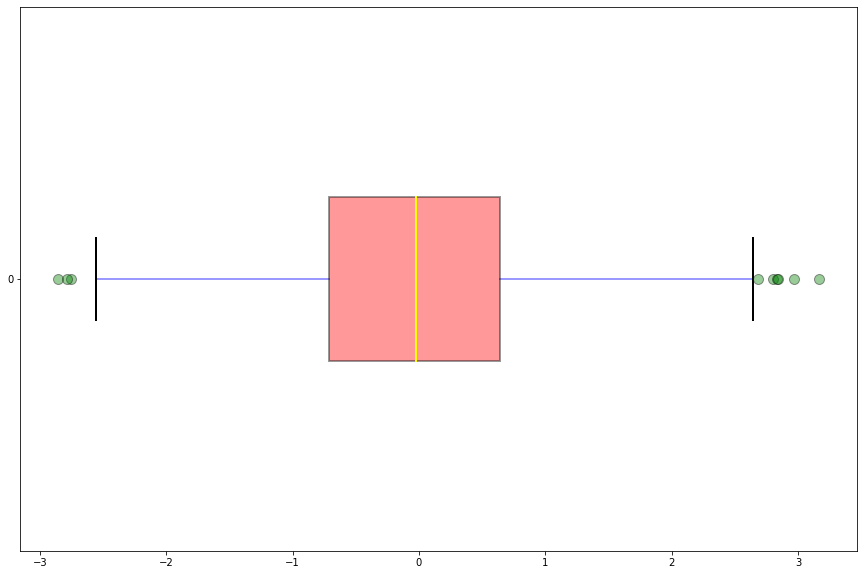

In [16]:
rand_subsampling = np.random.normal(0, 1, 1000)
plt.figure(figsize=(15, 10))
plt.boxplot(rand_subsampling,
                vert=False,
                patch_artist=True, 
                showfliers=True, # This would show outliers (the remaining .7% of the data)
                positions = [0],
                boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'red', alpha = .4),
                medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
                whiskerprops = dict(linestyle='-', linewidth=2, color='Blue', alpha = .4),
                capprops = dict(linestyle='-', linewidth=2, color='Black'),
                flierprops = dict(marker='o', markerfacecolor='green', markersize=10,
                  linestyle='none', alpha = .4),
                widths = .3,
                zorder = 1)   